# **1. Import des différentes librairies**

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2
import csv
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Model, load_model
from keras.applications.vgg16 import VGG16, preprocess_input #224*224
from keras.applications.xception import Xception
from keras.applications.resnet import ResNet152, ResNet50, ResNet101
from keras.applications.resnet_v2 import ResNet152V2
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from keras.applications.densenet import DenseNet201, DenseNet169, DenseNet121
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.inception_v3 import InceptionV3
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from keras.optimizers import SGD
from keras import utils
import seaborn as sns
import math
from PIL import Image
from google.colab import files
print("Tensorflow version: "+tf.__version__)

Tensorflow version: 2.14.0


# **2. Matériel : vérifier que le GPU est bien sélectionné (A COMPLETER)**

In [ ]:
# List all available GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    # Check which GPU is currently selected
    current_gpu = gpus[0]  # Assuming you have only one GPU
    print(f"Currently selected GPU: {current_gpu.name}")
else:
    print('No GPU available or selected')

Currently selected GPU: /physical_device:GPU:0


#**3. Téléchargement et analyse des données d'entrainement Small, DB1, DB2, DB3**

In [ ]:
bases_path_after="bases"
if os.path.exists(bases_path_after) == False:
    os.makedirs(bases_path_after)

## **3.1 Small dataset**

In [ ]:
!rm -rf sample_data
! wget --no-check-certificate https://nextcloud.ig.umons.ac.be/s/QP7FoyttxJgS8Cj/download/small.zip
! unzip small.zip -d 'bases'
! rm small.zip

--2023-11-20 19:40:43--  https://nextcloud.ig.umons.ac.be/s/QP7FoyttxJgS8Cj/download/small.zip
Resolving nextcloud.ig.umons.ac.be (nextcloud.ig.umons.ac.be)... 193.190.209.220
Connecting to nextcloud.ig.umons.ac.be (nextcloud.ig.umons.ac.be)|193.190.209.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 487265626 (465M) [application/zip]
Saving to: ‘small.zip’

small.zip           100%[===================>] 464.69M  23.8MB/s    in 21s     

2023-11-20 19:41:05 (21.9 MB/s) - ‘small.zip’ saved [487265626/487265626]

Archive:  small.zip
   creating: bases/small/
   creating: bases/small/fire/
  inflating: bases/small/fire/00000000.jpg  
  inflating: bases/small/fire/00000001.jpg  
  inflating: bases/small/fire/00000003.jpg  
  inflating: bases/small/fire/00000004.jpg  
  inflating: bases/small/fire/00000005.jpg  
  inflating: bases/small/fire/00000006.jpg  
  inflating: bases/small/fire/00000007.jpg  
  inflating: bases/small/fire/00000008.jpg  
  inflating: bas

## **3.2 DB1 dataset**

In [ ]:
!rm -rf sample_data
! wget --no-check-certificate https://nextcloud.ig.umons.ac.be/s/REWbK6K4XRtoeNw/download/FIRE_DATABASE_1.zip
! unzip FIRE_DATABASE_1.zip -d 'bases'
! rm FIRE_DATABASE_1.zip
! mv bases/FIRE_DATABASE_1 bases/DB1

--2023-11-20 19:41:11--  https://nextcloud.ig.umons.ac.be/s/REWbK6K4XRtoeNw/download/FIRE_DATABASE_1.zip
Resolving nextcloud.ig.umons.ac.be (nextcloud.ig.umons.ac.be)... 193.190.209.220
Connecting to nextcloud.ig.umons.ac.be (nextcloud.ig.umons.ac.be)|193.190.209.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 462058553 (441M) [application/zip]
Saving to: ‘FIRE_DATABASE_1.zip’

FIRE_DATABASE_1.zip 100%[===================>] 440.65M  23.7MB/s    in 20s     

2023-11-20 19:41:32 (22.3 MB/s) - ‘FIRE_DATABASE_1.zip’ saved [462058553/462058553]

Archive:  FIRE_DATABASE_1.zip
   creating: bases/FIRE_DATABASE_1/
   creating: bases/FIRE_DATABASE_1/fire/
  inflating: bases/FIRE_DATABASE_1/fire/00000000 copie.jpg  
  inflating: bases/FIRE_DATABASE_1/fire/00000000.jpg  
  inflating: bases/FIRE_DATABASE_1/fire/00000001 copie.jpg  
  inflating: bases/FIRE_DATABASE_1/fire/00000001.jpg  
  inflating: bases/FIRE_DATABASE_1/fire/00000003 copie.jpg  
  inflating: bases/FIRE

## **3.3 DB2 dataset**

In [ ]:
! rm -rf sample_data
! wget --no-check-certificate https://nextcloud.ig.umons.ac.be/s/faKyDy7LCxfz9Xk/download/FIRE_DATABASE_2.zip
! unzip FIRE_DATABASE_2.zip -d 'bases'
! rm FIRE_DATABASE_2.zip
! mv bases/FIRE_DATABASE_2 bases/DB2

--2023-11-20 19:41:38--  https://nextcloud.ig.umons.ac.be/s/faKyDy7LCxfz9Xk/download/FIRE_DATABASE_2.zip
Resolving nextcloud.ig.umons.ac.be (nextcloud.ig.umons.ac.be)... 193.190.209.220
Connecting to nextcloud.ig.umons.ac.be (nextcloud.ig.umons.ac.be)|193.190.209.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1151508462 (1.1G) [application/zip]
Saving to: ‘FIRE_DATABASE_2.zip’

FIRE_DATABASE_2.zip  93%[=================>  ]   1.01G  13.6MB/s    in 81s     

2023-11-20 19:43:00 (12.8 MB/s) - Connection closed at byte 1081458968. Retrying.

--2023-11-20 19:43:01--  (try: 2)  https://nextcloud.ig.umons.ac.be/s/faKyDy7LCxfz9Xk/download/FIRE_DATABASE_2.zip
Connecting to nextcloud.ig.umons.ac.be (nextcloud.ig.umons.ac.be)|193.190.209.220|:443... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 1151508462 (1.1G), 70049494 (67M) remaining [application/zip]
Saving to: ‘FIRE_DATABASE_2.zip’

FIRE_DATABASE_2.zip 100%[++++++++++++++++++=

## **3.4 DB3 dataset**

In [ ]:
!rm -rf sample_data
! wget --no-check-certificate https://nextcloud.ig.umons.ac.be/s/KaqzczZsXfsnMER/download/FIRE_DATABASE_3.zip
! unzip FIRE_DATABASE_3.zip -d 'bases'
! rm FIRE_DATABASE_3.zip
! mv bases/FIRE_DATABASE_3 bases/DB3

--2023-11-20 19:43:19--  https://nextcloud.ig.umons.ac.be/s/KaqzczZsXfsnMER/download/FIRE_DATABASE_3.zip
Resolving nextcloud.ig.umons.ac.be (nextcloud.ig.umons.ac.be)... 193.190.209.220
Connecting to nextcloud.ig.umons.ac.be (nextcloud.ig.umons.ac.be)|193.190.209.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 466235525 (445M) [application/zip]
Saving to: ‘FIRE_DATABASE_3.zip’

FIRE_DATABASE_3.zip 100%[===================>] 444.64M  7.68MB/s    in 59s     

2023-11-20 19:44:20 (7.56 MB/s) - ‘FIRE_DATABASE_3.zip’ saved [466235525/466235525]

Archive:  FIRE_DATABASE_3.zip
   creating: bases/FIRE_DATABASE_3/
   creating: bases/FIRE_DATABASE_3/fire/
  inflating: bases/FIRE_DATABASE_3/fire/00000000.jpg  
  inflating: bases/FIRE_DATABASE_3/fire/00000001.jpg  
  inflating: bases/FIRE_DATABASE_3/fire/00000003.jpg  
  inflating: bases/FIRE_DATABASE_3/fire/00000004.jpg  
  inflating: bases/FIRE_DATABASE_3/fire/00000005.jpg  
  inflating: bases/FIRE_DATABASE_3/fire/0

## **3.5 Suppression des fichiers en double dans les base de données**

In [ ]:
# Delete files with "copie" in their names in each folder and subfolder
! find . -type f -name "*copie*" -exec rm {} \;

## **3.6 Analyse des bases de données**

In [ ]:
# Chemin base de données
path = "bases"

# Liste des chemins vers les bases de données
database_paths = [
    'DB1',
    'DB2',
    'DB3',
    'small'
]

# Liste des dossiers à analyser
folders = ['start_fire', 'fire', 'no_fire']

for db_path in database_paths:
    print(f"Informations pour la base de données : {db_path}")

    # Dictionnaire pour stocker le nombre de fichiers par dossier
    file_count = {}

    # Compter le nombre de fichiers dans chaque dossier pour cette base de données
    total_files = 0
    for folder in folders:
        folder_path = os.path.join(path, db_path, folder)
        file_list = os.listdir(folder_path)
        file_count[folder] = len(file_list)
        total_files += len(file_list)

    # Calculer le pourcentage de chaque dossier par rapport au nombre total de fichiers pour cette base de données
    percentage_per_folder = {}
    for folder, count in file_count.items():
        percentage_per_folder[folder] = (count / total_files) * 100

    # Afficher les résultats pour cette base de données
    print("Nombre total de fichiers:", total_files)
    print("Nombre de fichiers par dossier:", file_count)
    print("Pourcentage de chaque dossier par rapport au total:")
    for folder, percentage in percentage_per_folder.items():
        print(f"{folder}: {percentage:.2f}%")
    print('\n')

Informations pour la base de données : DB1
Nombre total de fichiers: 1379
Nombre de fichiers par dossier: {'start_fire': 100, 'fire': 779, 'no_fire': 500}
Pourcentage de chaque dossier par rapport au total:
start_fire: 7.25%
fire: 56.49%
no_fire: 36.26%


Informations pour la base de données : DB2
Nombre total de fichiers: 74
Nombre de fichiers par dossier: {'start_fire': 14, 'fire': 30, 'no_fire': 30}
Pourcentage de chaque dossier par rapport au total:
start_fire: 18.92%
fire: 40.54%
no_fire: 40.54%


Informations pour la base de données : DB3
Nombre total de fichiers: 1500
Nombre de fichiers par dossier: {'start_fire': 500, 'fire': 500, 'no_fire': 500}
Pourcentage de chaque dossier par rapport au total:
start_fire: 33.33%
fire: 33.33%
no_fire: 33.33%


Informations pour la base de données : small
Nombre total de fichiers: 791
Nombre de fichiers par dossier: {'start_fire': 153, 'fire': 311, 'no_fire': 327}
Pourcentage de chaque dossier par rapport au total:
start_fire: 19.34%
fire: 39

#**4. Téléchargement des données de test "Test Dataset"**

In [ ]:
!rm -rf sample_data
!wget https://nextcloud.ig.umons.ac.be/s/RsZpqtYfDgYzKxr/download/test.zip
!unzip test.zip -d 'bases'
!rm test.zip

--2023-11-20 19:44:28--  https://nextcloud.ig.umons.ac.be/s/RsZpqtYfDgYzKxr/download/test.zip
Resolving nextcloud.ig.umons.ac.be (nextcloud.ig.umons.ac.be)... 193.190.209.220
Connecting to nextcloud.ig.umons.ac.be (nextcloud.ig.umons.ac.be)|193.190.209.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57038454 (54M) [application/zip]
Saving to: ‘test.zip’

test.zip            100%[===================>]  54.40M  16.7MB/s    in 3.3s    

2023-11-20 19:44:32 (16.7 MB/s) - ‘test.zip’ saved [57038454/57038454]

Archive:  test.zip
   creating: bases/test/
   creating: bases/test/fire/
  inflating: bases/test/fire/F_1001.jpg  
  inflating: bases/test/fire/F_2062.jpg  
  inflating: bases/test/fire/F_2063.jpg  
  inflating: bases/test/fire/F_2064.jpg  
  inflating: bases/test/fire/F_2066.jpg  
  inflating: bases/test/fire/F_2067.jpg  
  inflating: bases/test/fire/F_2068.jpg  
  inflating: bases/test/fire/F_2070.jpg  
  inflating: bases/test/fire/F_2071.jpg  
  inflat

#**5. Création du fichier de labels "classes.txt"**

In [ ]:
!printf '%s\n' 'fire' 'no_fire' 'start_fire'> classes.txt

# **6. Définition des fonctions**

In [ ]:
def create_dataset(dataset_path, subset, input_dim, batch_size, validation_split = 0.2, label_mode = "categorical"):
  return tf.keras.preprocessing.image_dataset_from_directory(
	dataset_path,                                     # chemin vers le jeu de données
	validation_split = validation_split,              # paritionnement du jeu de données en un jeu de validation (20%), train (80%)
	subset = subset,                                  # Sélection du type de jeu de données
	seed=42,                                          # Initialisation du générateur aléatoire (permutations)
	image_size = (input_dim, input_dim),              # Taille des images d'entrée
  batch_size = batch_size,                          # Taille du mini-batch
  label_mode = label_mode                           # Conversion au format One-Hot
)

#**7. Paramètres d'entrainement et sélection du modèle pré-entrainé**

In [ ]:
nb_classes = 3
batch_size=16 #@param [1,2,4,8,16,32,64,128] {type:"raw"}
epochs=20 #@param [5, 10,15, 20,30,50,100,200] {type:"raw"}
dataset_path = "bases"
input_dim = 299 #@param [224,299] {type:"raw"}
dataset_name='DB3' #@param ["small","DB1","DB2","DB3"]
train_dataset = os.path.join('bases/', dataset_name)
test_name='test' #@param ["test","test1","test2","test3"]
test_dataset = os.path.join('bases/', test_name)
classes_path = "classes.txt"
classifier = "InceptionV3" #@param ["Xception","VGG16","VGG19","ResNet50","ResNet121","ResNet152","ResNet50V2","ResNet121V2","ResNet152V2","InceptionV3","InceptionResNetV2","MobileNet","MobileNetV2","DenseNet121","DenseNet169","DenseNet201","NASNetLarge","NASNetMobile"] {type:"string"}
unfreeze_all_layers = True # @param {type:"boolean"}
nb_layers_unfreeze = 1 # @param {type:"slider", min: 0, max:10, step:1}
learning_rate = 0.001 # @param {type:"number"}

# **8. Compter le nombre de classes**

In [ ]:
# Récupérer les noms des classes
with open(classes_path, 'r') as f:
    classes = f.readlines()
    classes = list(map(lambda x: x.strip(), classes))
num_classes = len(classes)

# **9. Création earlyStopping**

In [ ]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 5 epochs
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 3,
                               restore_best_weights = True) # if val loss decreases for 5 epochs in a row, stop training

# **10. Création du jeu de données d'entraînement  (A COMPLETER)**

In [ ]:
train_ds = create_dataset(train_dataset, "training", input_dim, batch_size)

Found 1500 files belonging to 3 classes.
Using 1200 files for training.


#**11. Créer le jeu de validation (A COMPLETER : même générateur, One-Hot, jeu "validation")**

In [ ]:
val_ds = create_dataset(train_dataset, "validation", input_dim, batch_size)

Found 1500 files belonging to 3 classes.
Using 300 files for validation.


# **12. Télécharger un modèle préentraîné**



In [ ]:
base_model = globals()[classifier](include_top = False, weights = 'imagenet', input_shape = (input_dim, input_dim, 3))

87910968/87910968 [==============================] - 0s 0us/step


## **12.1 Analyser/visualiser l'architecture de votre modèle avec la fonction summary()**

In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalizati

# **13. Geler les couches du modèle préentrainer puis dégeler des couches du modèles préentrainer**



In [ ]:
print(len(base_model.layers))

#freeze all the layers
for layer in base_model.layers:
    layer.trainable = False

#Unfreeze all the layers
if(unfreeze_all_layers):
  for layer in base_model.layers:
    layer.trainable = True

#Unfreeze x last layers
elif(nb_layers_unfreeze != 0):
  for layer in base_model.layers[-nb_layers_unfreeze:]:
      layer.trainable = True

311


# **14. Appliquer le transfer learning**

In [ ]:
# Add a new output layer for your specific task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(units=2048, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = keras.layers.Dense(nb_classes, activation='softmax')(x)

model = keras.models.Model(inputs = base_model.input, outputs = predictions)

# **15. Compiler le modèle avec la descente de gradient stochastique DSG**


In [ ]:
# Compilez le modèle en spécifiant l'optimiseur
sgd = SGD(learning_rate = learning_rate)
model.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

# **16. Entraîner le modèle**

In [ ]:
history = model.fit(
    train_ds,
    steps_per_epoch = len(train_ds),
    epochs=epochs,
    batch_size = batch_size,
    validation_data = val_ds,
    validation_steps=len(val_ds),
    verbose = 1,
    callbacks = [early_stopping])

Epoch 1/20
75/75 [==============================] - 58s 331ms/step - loss: 0.9690 - accuracy: 0.5642 - val_loss: 0.8839 - val_accuracy: 0.6933
Epoch 2/20
75/75 [==============================] - 24s 298ms/step - loss: 0.7746 - accuracy: 0.7542 - val_loss: 0.6690 - val_accuracy: 0.8133
Epoch 3/20
75/75 [==============================] - 24s 295ms/step - loss: 0.5951 - accuracy: 0.8450 - val_loss: 0.5197 - val_accuracy: 0.8500
Epoch 4/20
75/75 [==============================] - 23s 294ms/step - loss: 0.4725 - accuracy: 0.8808 - val_loss: 0.4253 - val_accuracy: 0.8900
Epoch 5/20
75/75 [==============================] - 23s 293ms/step - loss: 0.4065 - accuracy: 0.9008 - val_loss: 0.3672 - val_accuracy: 0.8967
Epoch 6/20
75/75 [==============================] - 23s 298ms/step - loss: 0.3187 - accuracy: 0.9208 - val_loss: 0.3166 - val_accuracy: 0.9200
Epoch 7/20
75/75 [==============================] - 23s 298ms/step - loss: 0.2769 - accuracy: 0.9308 - val_loss: 0.2824 - val_accuracy: 0.9233

#**17. Sauvegarder le modèle final (A COMPLETER)**


In [ ]:
# Définissez le chemin de sauvegarde de votre modèle
model_save_path = f'Groupe9_{dataset_name}_{classifier}_{epochs}_{batch_size}.h5'  # Spécifiez le chemin et le nom de fichier souhaités

# Sauvegardez le modèle
model.save(model_save_path, save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#**18. Afficher des courbes d'entrainement/validation**

{'loss': [0.9689623117446899, 0.7746239900588989, 0.5951492190361023, 0.4725446105003357, 0.40647831559181213, 0.31865933537483215, 0.2768564224243164, 0.2611641585826874, 0.22203801572322845, 0.1817815601825714, 0.17726576328277588, 0.14834173023700714, 0.14547163248062134, 0.14758612215518951, 0.11149485409259796, 0.1007021814584732, 0.12149795889854431, 0.09321848303079605, 0.09926773607730865, 0.08825770765542984], 'accuracy': [0.5641666650772095, 0.7541666626930237, 0.8450000286102295, 0.8808333277702332, 0.9008333086967468, 0.9208333492279053, 0.9308333396911621, 0.934166669845581, 0.9416666626930237, 0.9566666483879089, 0.9508333206176758, 0.9616666436195374, 0.9516666531562805, 0.9599999785423279, 0.9758333563804626, 0.9750000238418579, 0.9599999785423279, 0.9766666889190674, 0.9725000262260437, 0.9758333563804626], 'val_loss': [0.8839483857154846, 0.6690158843994141, 0.5197455883026123, 0.4253470003604889, 0.3671790659427643, 0.3166104555130005, 0.2823822796344757, 0.256744742

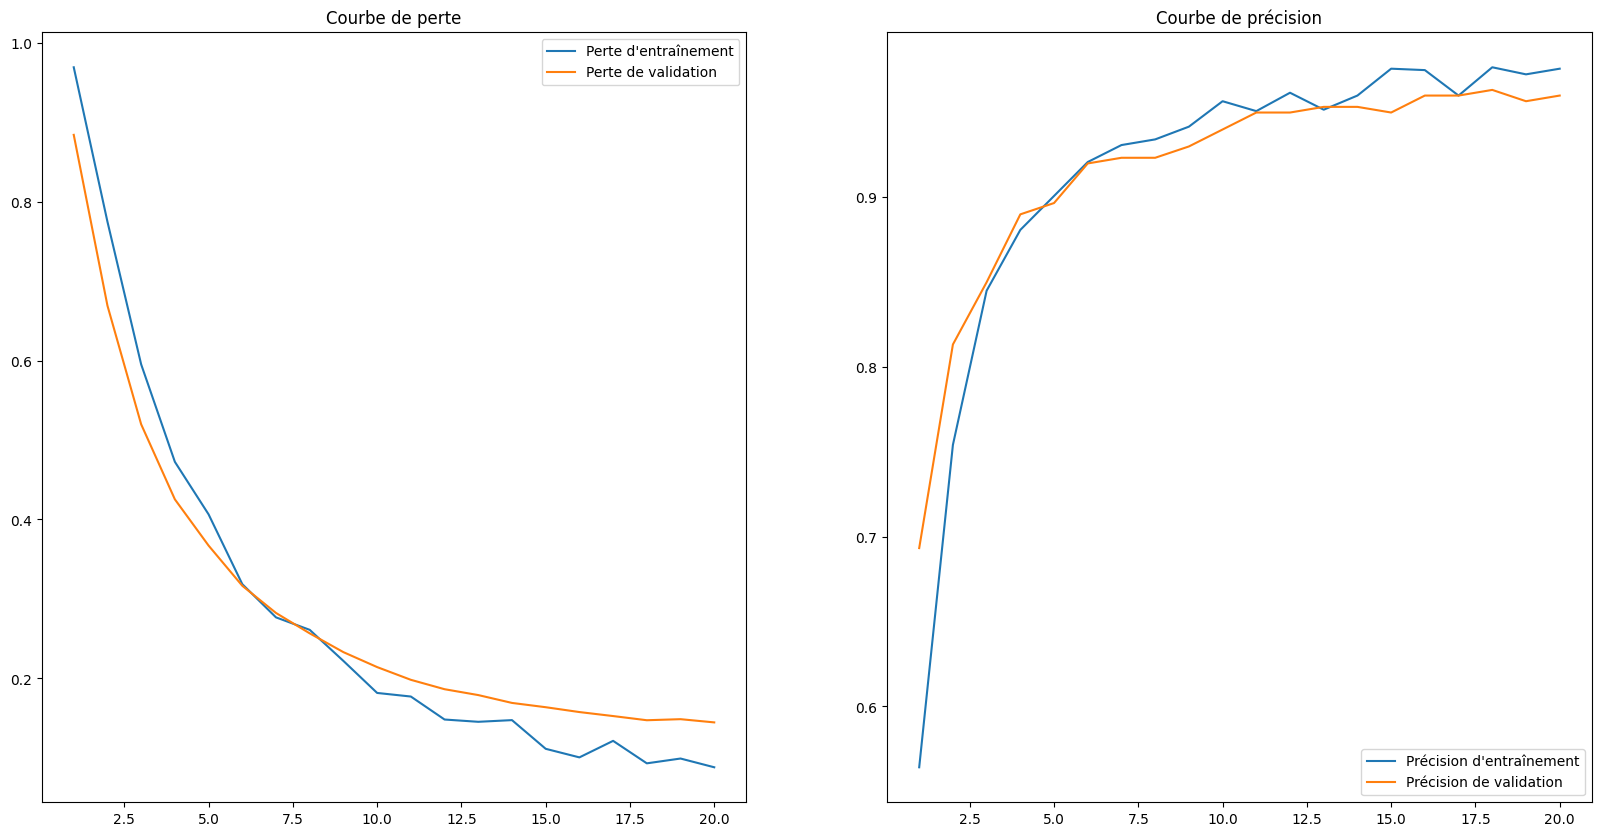

In [ ]:
print(history.history)
# Récupération de la perte et de la précision d'entraînement et de validation
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Affichage de la courbe d'apprentissage
epochs_range = range(1, len(loss)+1)
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Perte d\'entraînement')
plt.plot(epochs_range, val_loss, label='Perte de validation')
plt.legend(loc='upper right')
plt.title('Courbe de perte')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy, label='Précision d\'entraînement')
plt.plot(epochs_range, val_accuracy, label='Précision de validation')
plt.legend(loc='lower right')
plt.title('Courbe de précision')

plt.show()

print("Moyenne Training Loss: ", round(sum(loss) / len(loss), 4))
print("Moyenne Training Accuracy: ", round(sum(accuracy) / len(accuracy), 4))
print("Moyenne Validation Loss: ", round(sum(val_loss) / len(val_loss), 4))
print("Moyenne Validation Accuracy: ", round(sum(val_accuracy) / len(val_accuracy), 4))

# **19. Créer le jeu de données de test**

In [ ]:
test_ds = create_dataset(test_dataset, None, input_dim, batch_size, None)

Moyenne Training Loss:  0.2856
Moyenne Training Accuracy:  0.9145
Moyenne Validation Loss:  0.2908
Moyenne Validation Accuracy:  0.9168
Found 300 files belonging to 3 classes.


# **20. Evaluer le modèle avec ce jeu de données de test avec la fonction evaluate()**

In [ ]:
score = model.evaluate(test_ds, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 0.3139374256134033
Test Accuracy: 0.8700000047683716


# **21. Matrice de confusion**

19/19 [==============================] - 5s 90ms/step
[[45 24 31]
 [39 35 26]
 [37 29 34]]


<Axes: >

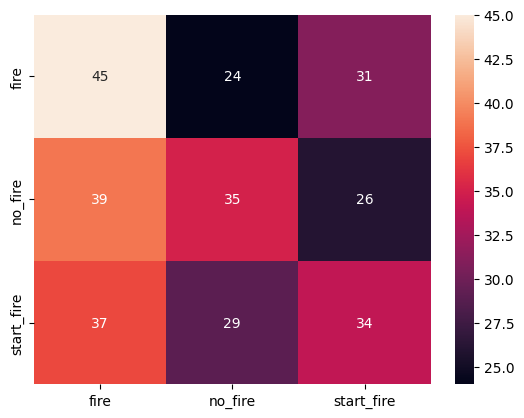

In [ ]:
# Supposons que predictions soit les prédictions de votre modèle sur les données de test
predictions = model.predict(test_ds)
test_labels = np.concatenate([y for x, y in test_ds])

y_test = np.argmax(test_labels, axis = -1)  # Assurez-vous d'avoir les vraies étiquettes en format one-hot

# Convertir les prédictions en classes
y_pred = np.argmax(predictions, axis = -1)

# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
# Afficher la matrice de confusion
sns.heatmap(conf_matrix, annot = True, fmt = 'g', xticklabels=classes, yticklabels=classes)


#**22. Tester le modèle avec une image de test: "fire.jpg" et "no_fire.jpg (A COMPLETER)"**

1/1 [==============================] - 2s 2s/step
Class Name : fire --- Class Probability: 89.09%
Class Name : no_fire --- Class Probability: 4.58%
Class Name : start_fire --- Class Probability: 6.33%


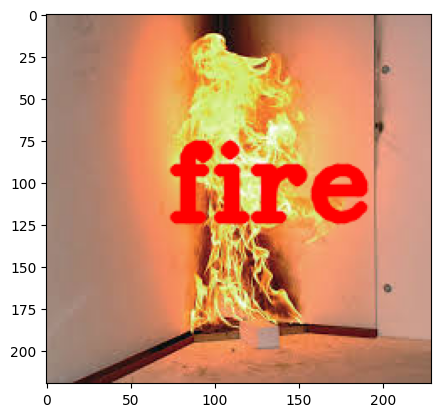

In [30]:
%matplotlib inline

classes = train_ds.class_names
image_path =  "fire.jpg"

img = Image.open(image_path).convert('RGB')
x = tf.keras.utils.img_to_array(img,data_format='channels_last')
x = tf.keras.preprocessing.image.smart_resize(x, size=(input_dim,input_dim))
x = np.expand_dims(x, axis=0)

# predict
pred = model.predict(x,batch_size=1)[0]

for (pos,prob) in enumerate(pred):
    class_name = classes[pos]
    if (pos == np.argmax(pred)) :
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        font = cv2.FONT_HERSHEY_COMPLEX
        textsize = cv2.getTextSize(class_name, font, 1, 2)[0]
        textX = (img.shape[1] - textsize[0]) / 2
        textY = (img.shape[0] + textsize[1]) / 2
        cv2.putText(img, class_name, (int(textX)-10, int(textY)), font, 2, (255,0,0), 6, cv2.LINE_AA)
        plt.imshow(img)
    #print("Top %d ====================" % (i + 1))
    print("Class Name : %s" % (class_name), "---", "Class Probability: %.2f%%" % (prob*100))
plt.show()